In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('hearing_test.csv')

In [3]:
dataset.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
dataset.shape

(5000, 3)

# Exploratory Data Analysis (EDA)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
dataset['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

In [7]:
dataset.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


<Axes: xlabel='test_result', ylabel='count'>

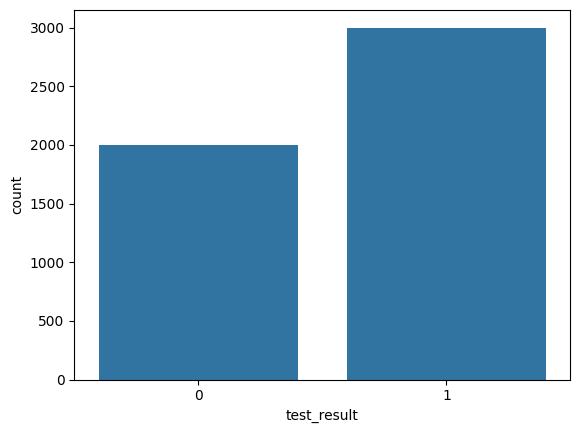

In [8]:
sns.countplot(x='test_result',data=dataset)

<Axes: xlabel='test_result', ylabel='age'>

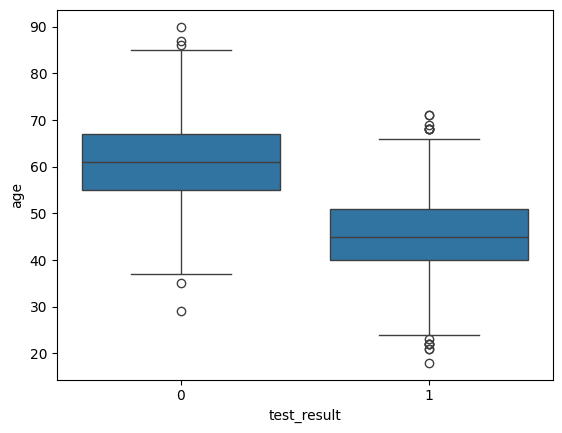

In [9]:
sns.boxplot(x='test_result',y='age',data=dataset)

<Axes: xlabel='test_result', ylabel='physical_score'>

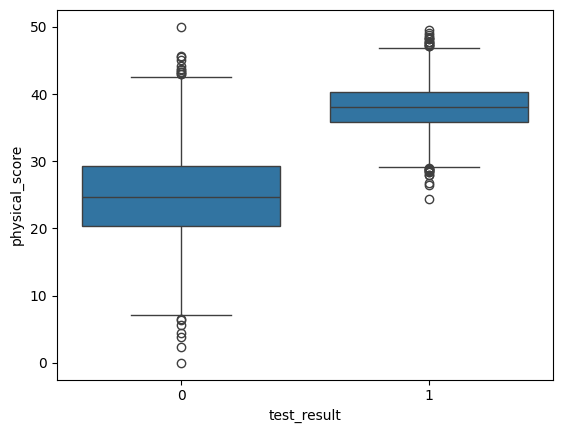

In [10]:
sns.boxplot(data = dataset, x ='test_result', y = 'physical_score')

<Axes: xlabel='test_result', ylabel='physical_score'>

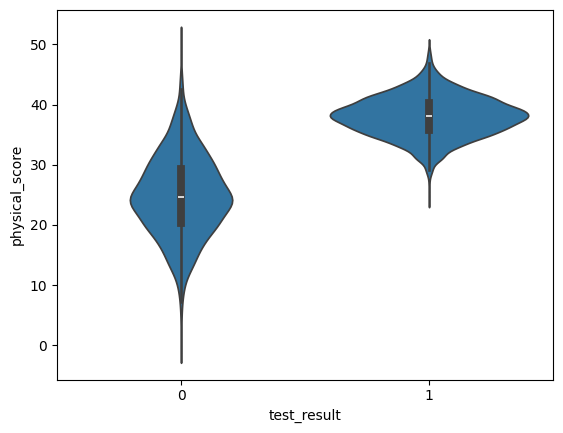

In [11]:
sns.violinplot(data = dataset, x ='test_result', y = 'physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

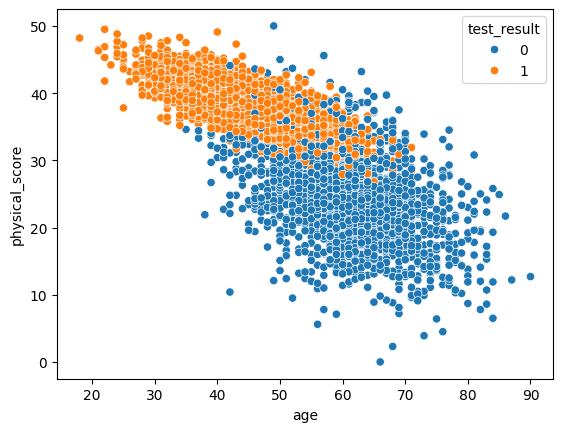

In [12]:
sns.scatterplot(x='age',y='physical_score',data=dataset, hue='test_result')

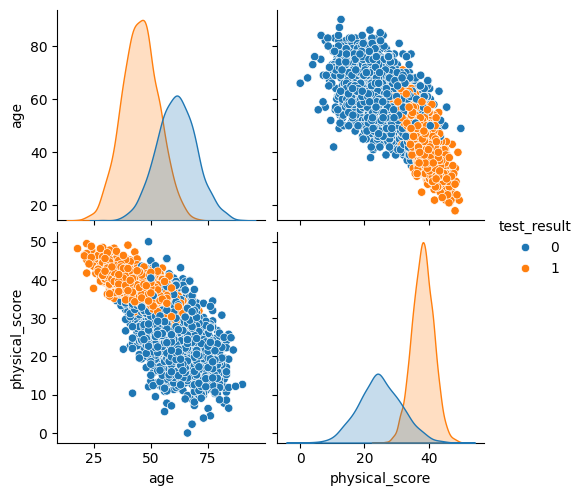

In [13]:
sns.pairplot(dataset, hue='test_result')

<Axes: >

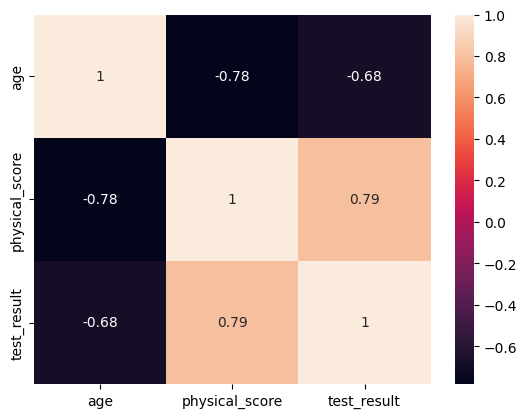

In [14]:
sns.heatmap(dataset.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

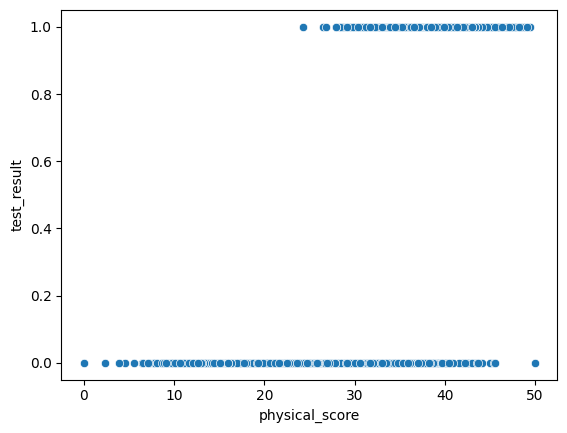

In [15]:
sns.scatterplot(x = 'physical_score', y = 'test_result', data = dataset)
#note: this is a bad plot, but it's just to show that you can plot a scatterplot with a categorical variable on the y-axis

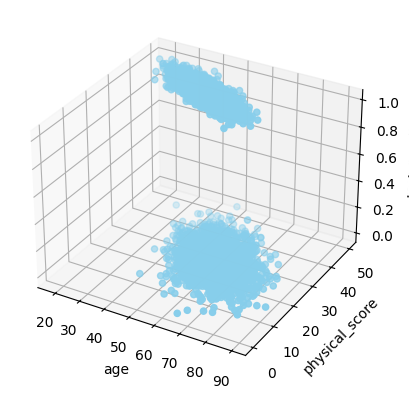

In [16]:
# matplotlib 3D scatterplot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(dataset['age'],
           dataset['physical_score'],
           dataset['test_result'],
           c='skyblue')
ax.set_xlabel("age")
ax.set_ylabel("physical_score")
ax.set_zlabel("test_result")
plt.show()

# Train | Test Split

In [17]:
X = dataset.drop('test_result',axis=1)
y = dataset['test_result']

In [18]:
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [19]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [22]:
sc = StandardScaler()

In [23]:
sc_X_train = sc.fit_transform(X_train)

In [24]:
sc_X_test = sc.transform(X_test)

# Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(sc_X_train,y_train)

LogisticRegression()

In [39]:
y_proba = log_model.predict_proba(sc_X_test)

In [29]:
y_pred = log_model.predict(sc_X_test)

In [30]:
log_model.coef_

array([[-0.91384609,  3.40328558]])

Coef:

1. expect odds of passing test to decrease (being -ve coefficient) per unit increase of age.
2. expect odds of passing test to increase (being +ve coefficient) per unit increase of physical test score.
3. based on ration together (3.40/0.913 in this case), the physical_score is more important than age meaning it is the better predictor of passing the test.

# Model Performance

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [32]:
accuracy_score(y_test,y_pred)

0.923

In [33]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[351,  38],
       [ 39, 572]], dtype=int64)

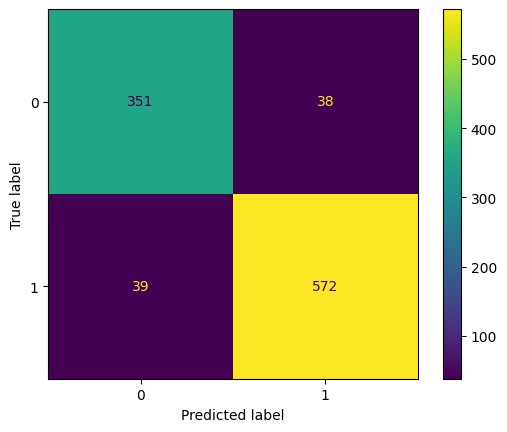

In [34]:
ConfusionMatrixDisplay(cm).plot()

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       389
           1       0.94      0.94      0.94       611

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



# Evaluating Curves

In [43]:
from sklearn import metrics


In [37]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [40]:
y_score = y_proba[:,1]

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


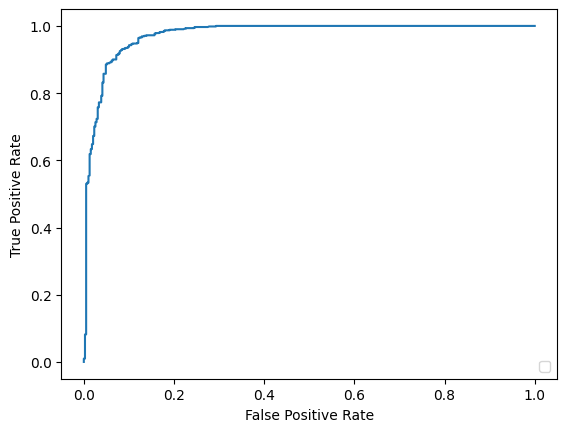

In [46]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [47]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_score)

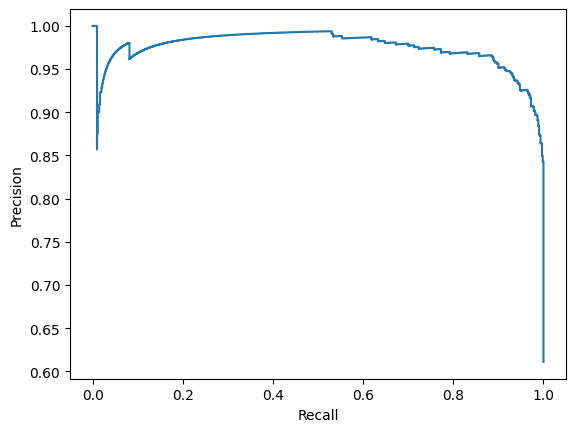

In [48]:
PrecisionRecallDisplay(precision=precision, recall=recall).plot()